In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df= pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv', low_memory = False)

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [8]:
df[df['neighbourhood group'] == 'Brooklyn']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,05-10-2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,05-10-2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
16,1010173,Only 2 stops to Manhattan studio,62566345680,unconfirmed,Heather,Brooklyn,Williamsburg,40.70837,-73.95352,United States,...,NaN,2.0,148.0,29-06-2019,1.20,3.0,1.0,197.0,"Absolutely no smoking in the building, handlin...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102587,6088571,Adorable One-Bed in Williamsburg!,20914678851,verified,Taylor,Brooklyn,Williamsburg,40.71687,-73.94656,United States,...,$78,1.0,66.0,16-06-2019,1.35,2.0,1.0,352.0,â€¢ Check-in time is 2PM. Check-out time is 11...,NaN
102589,6089676,Lrg room 1 block from Prospect Park,74549151787,unconfirmed,Dave,Brooklyn,Flatbush,40.65231,-73.96189,United States,...,$61,3.0,0.0,NaN,NaN,1.0,1.0,200.0,House Rules 1. Check-in is 4 pm local time. If...,NaN
102590,6090228,Wonderful artists' loft in Brooklyn,9184535139,unconfirmed,Daniel,Brooklyn,Crown Heights,40.66673,-73.96127,United States,...,$50,1.0,0.0,NaN,NaN,1.0,1.0,276.0,#NAME?,NaN
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN


In [27]:
# This cell is superseded by the corrected data cleaning steps in cell z-8d5_Uq-Svu.
# The original code in this cell caused an AttributeError because it attempted string operations
# on columns that may have already been converted to numeric after dropping rows.

# # Remove commas from 'price$' column
# df['price$'] = df['price$'].str.replace(',', '', regex=False)

# # Convert 'price$' and 'service fee$' to numeric, coercing errors
# df['price$'] = pd.to_numeric(df['price$'], errors='coerce')
# df['service fee$'] = pd.to_numeric(df['service fee$'], errors='coerce')

# #drop all record with missing values
# df.dropna(inplace= True)

# #change al mismatched data types to appropriate once
# df['id'] = df['id'].astype(str)
# df['host id'] =  df['host id'].astype(str)
# df['last review'] = pd.to_datetime(df['last review'])
# df['Construction year'] = df['Construction year'].astype(str)

# #correct the spelling of 'brooklyn' to 'Brooklyn'
# df.loc[df['neighbourhood group'] == 'brooklyn', 'neighbourhood group'] = 'Brooklyn'

# # git rid of outliersin the 'availability 360' column data
# df= df.drop(df[df['availability 365'] > 500].index)

In [28]:
#drop duplicate records
df.drop_duplicates(inplace=True)

# drop house_rules and license column with insufficient data
# df.drop(['house_rules', 'license'], axis= 1,inplace= True)

# Clean column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

#Rename the price and service fee columns to include a dollar sign
df.rename(columns={'price': 'price$', 'service fee': 'service fee$'}, inplace= True)

# Convert 'price$' and 'service fee$' to string type before replacing
df['price$'] = df['price$'].astype(str).str.replace('$','', regex= False)
df['service fee$'] = df['service fee$'].astype(str).str.replace('$','', regex= False)

# Remove commas from 'price$' column
df['price$'] = df['price$'].str.replace(',', '', regex=False)

# Attempt to convert to numeric, coercing errors
df['price$'] = pd.to_numeric(df['price$'], errors='coerce')
df['service fee$'] = pd.to_numeric(df['service fee$'], errors='coerce')


#drop all record with missing values
df.dropna(inplace= True)

#change al mismatched data types to appropriate once
df['id'] = df['id'].astype(str)
df['host id'] =  df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(str)

#correct the spelling of 'brooklyn' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brooklyn', 'neighbourhood group'] = 'Brooklyn'

# git rid of outliersin the 'availability 360' column data
df= df.drop(df[df['availability 365'] > 500].index)

In [29]:
df.duplicated().value_counts()

,count
False,83411


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

In [31]:
#summary statistics
df.describe()

,lat,long,price$,service fee$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


In [34]:
#what are different property types in data set
property_types = df['room type'].value_counts().to_frame()
property_types



,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


Text(0.5, 1.0, 'Property Types and their count in the Dataset')

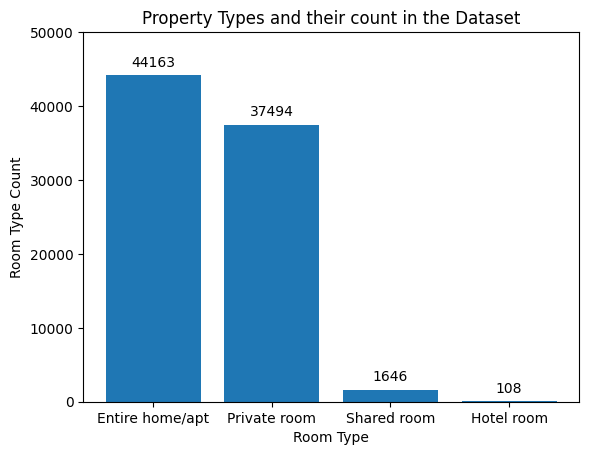

In [35]:
#Room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"])
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4)
plt.ylim([0,50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')

In [36]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34635
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816
brookln,1


Text(0.5, 1.0, 'Which Neighborhood Groups has the highest number of listings')

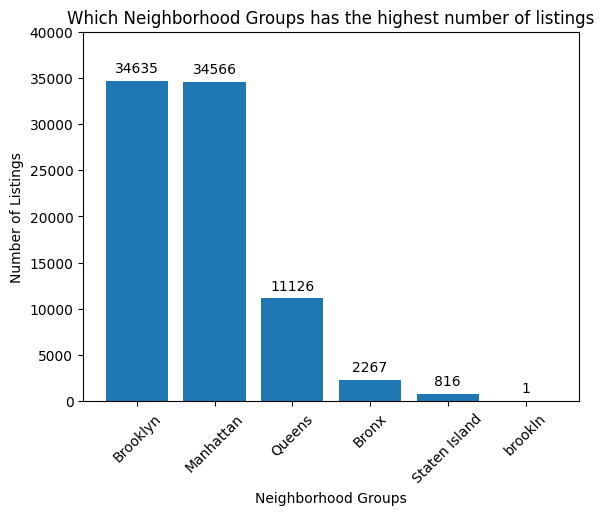

In [37]:
#Which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"])
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding = 4)
plt.ylim([0,40000])
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation= 45)
plt.title('Which Neighborhood Groups has the highest number of listings')

Text(0.5, 1.0, 'Average Price per listings ($) in each Neighborhood Group')

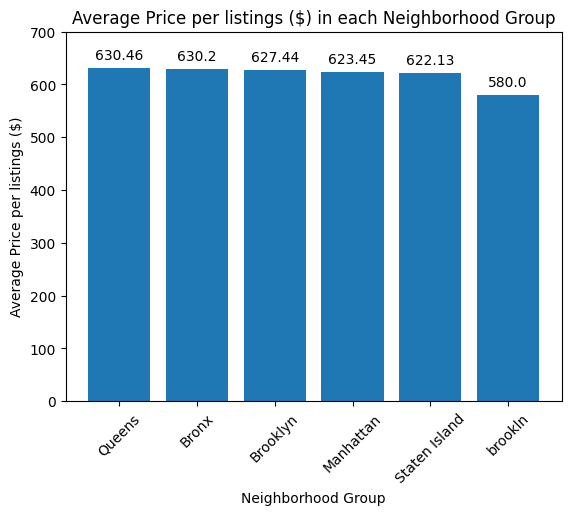

In [39]:
#Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price$'])
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price$"], 2), label_type = 'edge', padding = 4)
plt.ylim([0,700])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per listings ($)')
plt.xticks(rotation = 45)
plt.title('Average Price per listings ($) in each Neighborhood Group')

Text(0.5, 1.0, 'Average Price ($) for Properties in each Construction Year')

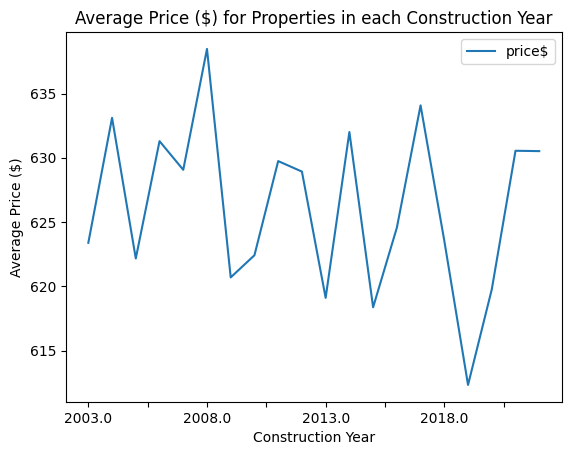

In [41]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year')

Text(0.5, 1.0, 'Top 10 Hosts by Calculated host listings Count')

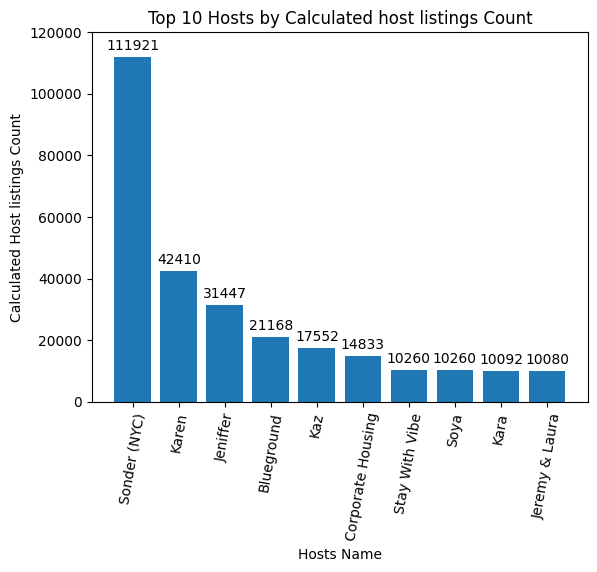

In [42]:
#Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count'])
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3)
plt.xlabel('Hosts Name')
plt.ylabel('Calculated Host listings Count')
plt.xticks(rotation = 80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated host listings Count')

In [43]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review


,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


Text(0.5, 1.0, 'Average Review Rate for each Verification Statistics.')

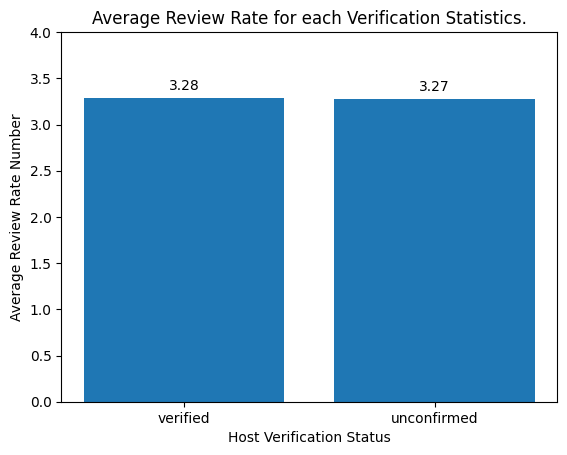

In [44]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"])
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4)
plt.ylim([0,4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for each Verification Statistics.')

Text(0.5, 1.0, 'Average Review Rate for each Verification Status')

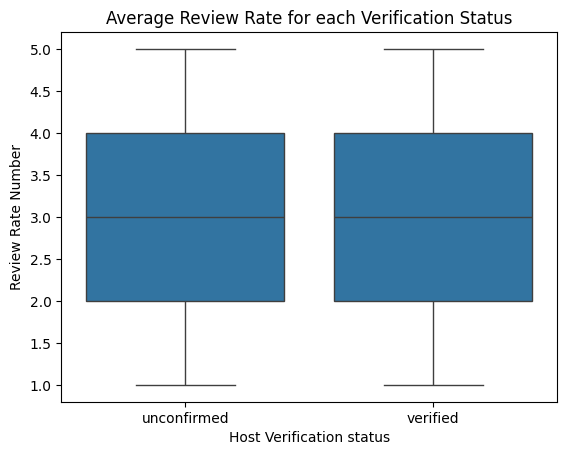

In [45]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color)
plt.xlabel('Host Verification status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each Verification Status')

In [49]:
#Is there a correlation between the price of a listing and its service fee?
df['price$'].corr(df['service fee$'])

np.float64(0.9999909074778258)

Text(0.5, 1.0, 'A Regression Plot showing the Correlation of the Price of a listing and its Service Fee.')

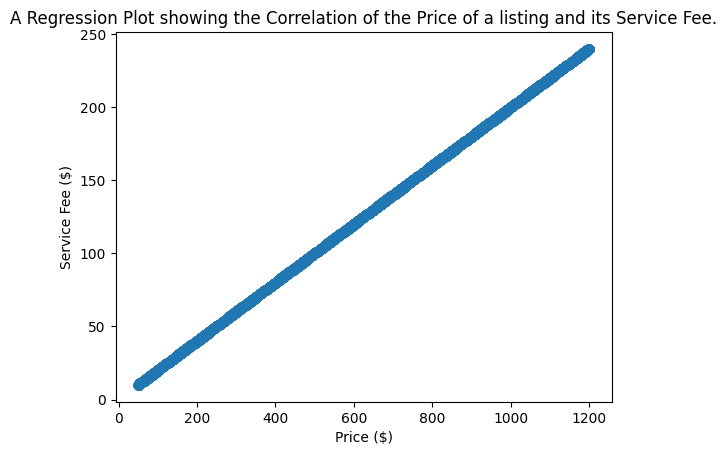

In [51]:
sns.regplot(df, x = 'price$', y = 'service fee$')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('A Regression Plot showing the Correlation of the Price of a listing and its Service Fee.')

In [52]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274860
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286
brookln             Private room               4.000000

Text(0.5, 1.0, 'Average Review Rate for each Room/Property Type in each Neighbourhood Group.')

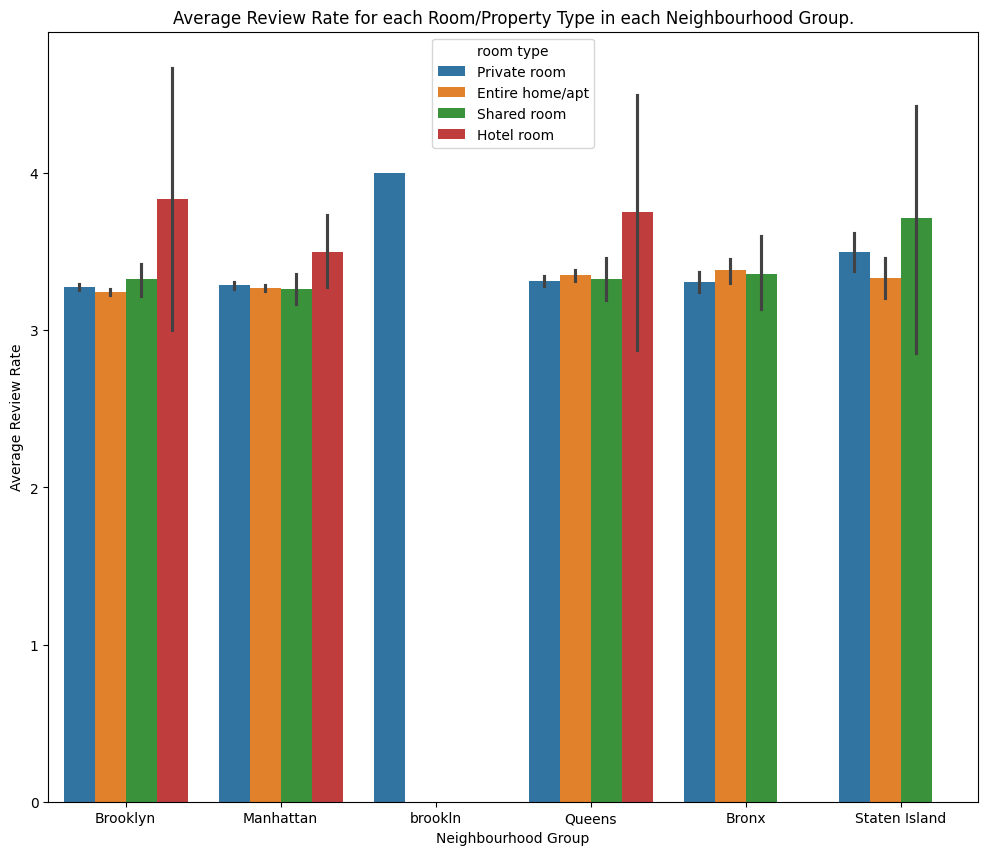

In [53]:
plt.figure(figsize = [12,10])
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.')

Text(0.5, 1.0, 'A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')

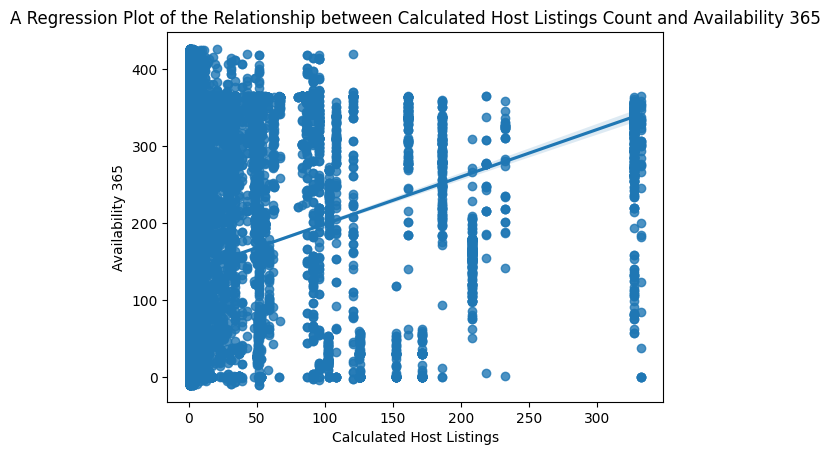

In [54]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365')
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')

In [55]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359855273675869)